In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math

dataFolder = "D:\\Uni\\DataOutput\\"
fName_2MIN = "TerminusEst_MCTS_2MIN"

In [2]:
def remove_space_from_column_names(df):
    for col in df.columns:
        if (col[0] == " "):
            df = df.rename(columns={col: col[1:]})
    
    return df

In [3]:
# Gather all data from the quick run into a single comprehensible file.
l_post = []
for i in (range(1, 50, 10)):
    l_post.append((i, i+9))

qRunFiles = []
for post in l_post:
    qRunFiles.append(dataFolder + fName_2MIN + "_" + str(post[0]) + "_" + str(post[1]) + ".csv")

dataQR = pd.read_csv(qRunFiles[0])

for d in range (1, 5):
    dataQR = pd.concat([dataQR, pd.read_csv(qRunFiles[d])], axis=0)

# Appears to be some error in column naming where a single space is in front...


for col in dataQR.columns:
    if (col[0] == " "):
        dataQR = dataQR.rename(columns={col: col[1:]})

time_searched = dataQR.TIME_TOTAL - dataQR.TIME_BUILD_SEARCH_TREE
dataQR.insert(3, "TIME_SEARCH", time_searched, True)
dataQR = dataQR.sort_values(by=['ID']).reset_index(drop=True)

In [4]:
# Quick look at the data.
dataQR

,ID,TIME_TOTAL,TIME_BUILD_SEARCH_TREE,TIME_SEARCH,HYB_EXACT,HYB_LOWER,HYB_UPPER,SOLUTION_NODE_DEPTH,SOLUTION_NODE_INSTANCE,SOLUTION_DEPTH_TOTAL,CANCELED
0,D:/Uni/TreeGen/FinalData/b0n100c25_1.txt,42.759,40.939,1.820,16,15,16,16,-1,-1,false
1,D:/Uni/TreeGen/FinalData/b0n100c25_10.txt,80.486,54.328,26.158,20,19,20,20,-1,-1,false
2,D:/Uni/TreeGen/FinalData/b0n100c25_11.txt,49.515,38.343,11.172,18,17,18,18,-1,-1,false
3,D:/Uni/TreeGen/FinalData/b0n100c25_12.txt,39.328,37.177,2.151,17,16,17,17,-1,-1,false
4,D:/Uni/TreeGen/FinalData/b0n100c25_13.txt,54.543,38.084,16.459,18,18,19,9,18,28,false
...,...,...,...,...,...,...,...,...,...,...,...
395,D:/Uni/TreeGen/FinalData/b1n50c50_50.txt,39.147,18.554,20.593,16,15,16,16,-1,-1,false
396,D:/Uni/TreeGen/FinalData/b1n50c50_6.txt,27.468,22.239,5.229,14,13,14,14,-1,-1,false
397,D:/Uni/TreeGen/FinalData/b1n50c50_7.txt,19.084,15.099,3.985,15,14,15,15,-1,-1,false
398,D:/Uni/TreeGen/FinalData/b1n50c50_8.txt,120.001,23.840,96.161,-1,14,16,-1,-1,-1,true


In [5]:
d_known = dataQR.loc[dataQR.HYB_EXACT >= 0]
d_unknown = dataQR.loc[dataQR.HYB_EXACT < 0]

print("Finished instances: ", len(d_known), "\tUnfinished instances: ", len(d_unknown))

Finished instances:  280 	Unfinished instances:  120


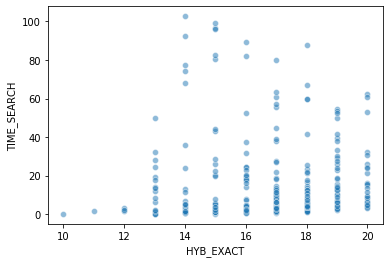

In [6]:
sns.scatterplot(d_known.HYB_EXACT, d_known.TIME_SEARCH, alpha=0.5)

In [7]:
# Defining the datasets.
d_easy = d_known.loc[d_known.TIME_SEARCH <= 10]
d_medium = d_known.loc[d_known.TIME_SEARCH > 10]
d_hard = d_unknown

In [8]:
print("Sizes.\nEasy: ", len(d_easy), "\tMedium: ", len(d_medium), "\tHard: ", len(d_hard))

Sizes.
Easy:  157 	Medium:  123 	Hard:  120


In [9]:
# Separating the datasets into their own separate text files.
def separate_datasets():
    location = "D:\\Uni\\DataInput\\"

    def save_file_names(d, name, location):
        fName = location+name
        f = open(fName, "w+")

        for point in d:
            f.write(point + "\n")

        f.close()

    save_file_names(d_easy.ID.values, "data_easy.txt", location)
    save_file_names(d_medium.ID.values, "data_medium.txt", location)
    save_file_names(d_hard.ID.values, "data_hard.txt", location)

In [10]:
def collect_files_with_text(text, path):
    files = []
    for r, d, f in os.walk(path):
        for file in f:
            if text in file:
                files.append(os.path.join(r, file))
    
    return files

def get_one_dataframe(files):
    d = pd.read_csv(files[0])
    for i in range(1, len(files)):
        d = pd.concat([d, pd.read_csv(files[i])], axis=0, sort=False)
    return d

filesB = collect_files_with_text('basicTE', dataFolder)
dataB = get_one_dataframe(filesB)
dataB = remove_space_from_column_names(dataB)
dataB

,ID,BASIC_HYB,BASIC_RUNTIME,BASIC_LB
0,D:/Uni/TreeGen/FinalData/b0n50c25_4.txt,16,14.509,NaN
1,D:/Uni/TreeGen/FinalData/b0n50c25_6.txt,15,2.312,NaN
2,D:/Uni/TreeGen/FinalData/b0n50c50_8.txt,10,0.113,NaN
3,D:/Uni/TreeGen/FinalData/b0n100c25_1.txt,16,1.661,NaN
4,D:/Uni/TreeGen/FinalData/b0n100c25_2.txt,18,6.188,NaN
...,...,...,...,...
82,D:/Uni/TreeGen/FinalData/b1n100c50_42.txt,17,83.613,NaN
83,D:/Uni/TreeGen/FinalData/b1n100c50_43.txt,19,15.671,NaN
84,D:/Uni/TreeGen/FinalData/b1n100c50_48.txt,17,119.039,NaN
85,D:/Uni/TreeGen/FinalData/b1n100c50_49.txt,17,74.367,NaN


In [11]:
def set_lower_bound(x):
    if (x.BASIC_HYB == -1 and math.isnan(x.BASIC_LB)):
        print("ERROR! LB NOT LOGGED.")
    elif (not math.isnan(x.BASIC_LB)):
        if (x.BASIC_LB <= 0):
            print("ERROR!")
            print(x)
            return -1
        else:
            return x.BASIC_LB
    else:
        return x.BASIC_HYB
    
dataB["LB_2"] = dataB.apply(set_lower_bound, axis=1)
dataB = dataB.sort_values(by=['ID']).reset_index(drop=True)

In [12]:
def row_match(d1, d2, row_id):
    if (len(d1.index) != len(d2.index)):
        return false
    
    matches = d1[row_id] != d2[row_id]
    return not matches.any()

row_match(dataB, dataQR, 'ID')

True

In [13]:
lb = dataB[['ID', 'LB_2']]
ub = dataQR[['ID', 'HYB_UPPER', 'TIME_BUILD_SEARCH_TREE']]
bounds = pd.merge(lb, ub, on='ID')
bounds = bounds.rename(columns={'LB_2':'LB', 'HYB_UPPER':'UB'})
bounds['AR'] = bounds.UB / bounds.LB
bounds['EXACT'] = bounds.LB == bounds.UB

In [14]:
bounds['DIFF'] = bounds.UB - bounds.LB
bounds

,ID,LB,UB,TIME_BUILD_SEARCH_TREE,AR,EXACT,DIFF
0,D:/Uni/TreeGen/FinalData/b0n100c25_1.txt,16.0,16,40.939,1.000000,True,0.0
1,D:/Uni/TreeGen/FinalData/b0n100c25_10.txt,20.0,20,54.328,1.000000,True,0.0
2,D:/Uni/TreeGen/FinalData/b0n100c25_11.txt,18.0,18,38.343,1.000000,True,0.0
3,D:/Uni/TreeGen/FinalData/b0n100c25_12.txt,17.0,17,37.177,1.000000,True,0.0
4,D:/Uni/TreeGen/FinalData/b0n100c25_13.txt,18.0,19,38.084,1.055556,False,1.0
...,...,...,...,...,...,...,...
395,D:/Uni/TreeGen/FinalData/b1n50c50_50.txt,16.0,16,18.554,1.000000,True,0.0
396,D:/Uni/TreeGen/FinalData/b1n50c50_6.txt,14.0,14,22.239,1.000000,True,0.0
397,D:/Uni/TreeGen/FinalData/b1n50c50_7.txt,15.0,15,15.099,1.000000,True,0.0
398,D:/Uni/TreeGen/FinalData/b1n50c50_8.txt,15.0,16,23.840,1.066667,False,1.0


In [89]:
bounds.mean()

LB                        16.792500
UB                        17.105000
TIME_BUILD_SEARCH_TREE    28.871100
AR                         1.019632
EXACT                      0.812500
DIFF                       0.312500
dtype: float64

In [16]:
id_easy = d_easy.ID.values
id_medium = d_medium.ID.values
id_hard = d_hard.ID.values

In [17]:
bounds_easy = bounds[bounds.ID.isin(id_easy)]
bounds_medium = bounds[bounds.ID.isin(id_medium)]
bounds_hard = bounds[bounds.ID.isin(id_hard)]

In [18]:
print("Easy dataset AAS: \n", bounds_easy.mean(),"\n\n", bounds_easy.std())
print("\nMedium dataset AAS: \n", bounds_medium.mean(), "\n\n", bounds_medium.std())
print("\nHard dataset AAS: \n", bounds_hard.mean(), "\n\n", bounds_hard.std())

Easy dataset AAS: 
 LB                        16.547771
UB                        16.605096
TIME_BUILD_SEARCH_TREE    29.525236
AR                         1.003392
EXACT                      0.942675
DIFF                       0.057325
dtype: float64 

 LB                         2.098369
UB                         2.126626
TIME_BUILD_SEARCH_TREE    12.934342
AR                         0.013894
EXACT                      0.233206
DIFF                       0.233206
dtype: float64

Medium dataset AAS: 
 LB                        17.065041
UB                        17.138211
TIME_BUILD_SEARCH_TREE    29.715407
AR                         1.004038
EXACT                      0.926829
DIFF                       0.073171
dtype: float64 

 LB                         2.095036
UB                         2.155151
TIME_BUILD_SEARCH_TREE    14.042333
AR                         0.014534
EXACT                      0.261482
DIFF                       0.261482
dtype: float64

Hard dataset AAS: 
 LB    

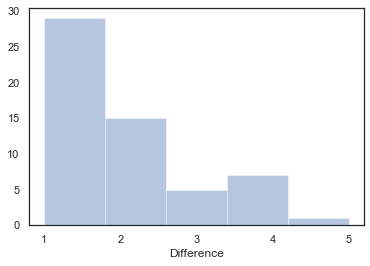

In [19]:
def nonexact(d):
    temp = d[(d.UB-d.LB) >=1]
    return (temp.UB - temp.LB)
    

sns.set(style='white')
fig, ax =plt.subplots()
ax = sns.distplot(nonexact(bounds_hard), kde=False, bins=5, axlabel="Difference")
ax.set_xticks([1,2,3,4,5])
# ax.set_xticklabels([1,2,3,4,5])
# ax.bar([1,2,3,4,5], 3, align='center')

In [20]:
def remove_incomplete(d):
    return d.loc[d.UPPER_BOUND != -1]

def unknown_to_20(x):
    if x.UPPER_BOUND == -1:
        return 20
    else:
        return x.UPPER_BOUND

def worst_case_incomplete(d):
    return d.apply(lambda x: unknown_to_20(x), axis=1)

# Parameter tuning data presentation.
def present_param_tuning_info(name):
    f = collect_files_with_text(name, dataFolder)
    d = get_one_dataframe(f)
    d = remove_space_from_column_names(d)
    # d.UPPER_BOUND = worst_case_incomplete(d)
    # d.DEPTH_FIRST_SOLUTION = worst_case_incomplete(d)
    
    # Get the lower bound for the relevant entries
    lbs = bounds[bounds.ID.isin(d.ID)]
    temp = pd.merge(d, lbs[['ID', 'LB']], on='ID')
    d['AAR'] = temp.UPPER_BOUND / temp.LB
    d['DIFF'] = temp.UPPER_BOUND - temp.LB
    d['DIFF_FIRST'] = temp.DEPTH_FIRST_SOLUTION - temp.UPPER_BOUND
    
    return d
    

pt_hard = present_param_tuning_info("treeTE_hard_2_2")
pt_hard_c = remove_incomplete(pt_hard)
subset = pt_hard[['AAR', 'DIFF', 'DIFF_FIRST', 'DEPTH_AVG', 'SHALLOWEST_LEAF', 'DEEPEST_NODE']]
print(subset.mean())
print("\nIncomplete: ", len(pt_hard_c.index) / len(pt_hard.index))
print(subset.std())

AAR                 1.054525
DIFF                0.850000
DIFF_FIRST          0.008333
DEPTH_AVG          13.122434
SHALLOWEST_LEAF     4.366667
DEEPEST_NODE       21.308333
dtype: float64

Incomplete:  1.0
AAR                0.078254
DIFF               1.164243
DIFF_FIRST         0.091287
DEPTH_AVG          1.917282
SHALLOWEST_LEAF    0.564099
DEEPEST_NODE       1.895576
dtype: float64


In [119]:
def present_meta_search_info(name):
    f = collect_files_with_text(name, dataFolder)
    
    points = []
    for file in f:
        d = pd.read_csv(file)
        lbs = bounds[bounds.ID.isin(d.ID)]
        temp = pd.merge(d, lbs[['ID', 'LB']], on='ID')
        temp['DIFF'] = temp.UPPER_BOUND - temp.LB
        if not 'T_COMPLETED' in temp.columns:
            temp['T_COMPLETED'] = temp.trees[0]
        points.append([temp.trees[0], temp.DIFF.mean(), (temp.trees > temp.T_COMPLETED).any()])
    
    return (points)


l_meta1 = present_meta_search_info("metaTE_50k_hard")
l_meta1.sort()

l_meta2 = present_meta_search_info("metaTE_hard")
l_meta2.sort()

In [120]:
d_meta1 = pd.DataFrame(l_meta1)
d_meta2 = pd.DataFrame(l_meta2)

In [97]:

d_meta1

,0,1,2
0,1,1.108333,False
1,5,0.791667,False
2,9,0.758333,False
3,13,0.741667,False
4,17,0.750000,False


Text(0.5, 0, 'Number of runs')

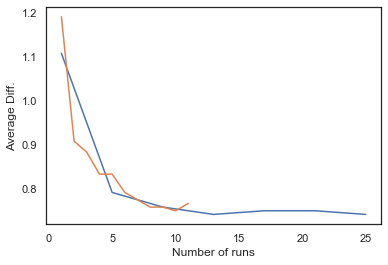

In [121]:
plt.plot(d_meta1[0], d_meta1[1])
plt.plot(d_meta2[0], d_meta2[1])
plt.ylabel('Average Diff.')
plt.xlabel('Number of runs')


In [118]:
db_hard = dataB[dataB.ID.isin(id_hard)]
print("Avg. Diff: ", db_hard[db_hard.BASIC_HYB >= 0].BASIC_HYB.mean())
print("Percent found: ", len(db_hard[db_hard.BASIC_HYB >= 0].index) / len(db_hard.index))
print("AVg. time: ", dataB.BASIC_RUNTIME.mean())

db_hard

Avg. Diff:  17.146341463414632
Percent found:  0.3416666666666667
AVg. time:  183.76472250000006


,ID,BASIC_HYB,BASIC_RUNTIME,BASIC_LB,LB_2
6,D:/Uni/TreeGen/FinalData/b0n100c25_15.txt,-1,600.000,20.0,20.0
32,D:/Uni/TreeGen/FinalData/b0n100c25_39.txt,-1,600.000,20.0,20.0
37,D:/Uni/TreeGen/FinalData/b0n100c25_43.txt,20,591.389,20.0,20.0
51,D:/Uni/TreeGen/FinalData/b0n100c50_10.txt,-1,600.000,15.0,15.0
53,D:/Uni/TreeGen/FinalData/b0n100c50_12.txt,-1,600.000,16.0,16.0
...,...,...,...,...,...
390,D:/Uni/TreeGen/FinalData/b1n50c50_46.txt,16,197.209,16.0,16.0
391,D:/Uni/TreeGen/FinalData/b1n50c50_47.txt,-1,600.000,15.0,15.0
392,D:/Uni/TreeGen/FinalData/b1n50c50_48.txt,-1,600.000,17.0,17.0
398,D:/Uni/TreeGen/FinalData/b1n50c50_8.txt,-1,600.000,15.0,15.0
